Начну с импорта библиотек и считывания файлов.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
a = pd.read_csv(r"C:\Users\moonl\csv\assessments.csv")

In [3]:
a.shape

(206, 6)

**assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).

code_module — идентификационный код предмета.

code_presentation — семестр (Идентификационный код).

id_assessment — тест (Идентификационный номер ассессмента).

assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [4]:
courses = pd.read_csv(r"C:\Users\moonl\csv\courses.csv")

In [5]:
courses.shape

(22, 3)

**courses.csv** — файл содержит список предметов по семестрам.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код).

module_presentation_length — продолжительность семестра в днях.

In [6]:
sa = pd.read_csv(r"C:\Users\moonl\csv\studentAssessment.csv")

In [7]:
sa

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


**studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

id_assessment — тест (идентификационный номер).

id_student — идентификационный номер студента.

date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [8]:
sreg = pd.read_csv(r"C:\Users\moonl\csv\studentRegistration.csv")

In [9]:
sreg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


**studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

code_module — предмет (идентификационный код).

code_presentation — семестр (идентификационный код)

id_student — идентификационный номер студента.

date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

 =========================================================================================================================

**Задание 1.** Сколько студентов успешно сдали только один курс? *(Успешная сдача — это зачёт по курсу на экзамене)*

In [10]:
asa = a.merge(sa, on = 'id_assessment')

Соединяем таблицу ***assessment*** с таблицой ***studentAssessment***, т.к. первая содержит информацию о типе теста, а точнее об экзамене, а вторая об оценке.

In [11]:
asa

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,37437,TMA,173.0,0.0,652462,172,0,60.0
173908,GGG,2014J,37437,TMA,173.0,0.0,652539,176,0,75.0
173909,GGG,2014J,37437,TMA,173.0,0.0,653157,187,0,70.0
173910,GGG,2014J,37437,TMA,173.0,0.0,653252,171,0,70.0


In [12]:
asa_exam = asa.query("assessment_type == 'Exam'")

Отбираем только типы теста **"Exam"**, т.к. нас интересует только оценка за **экзамен**.

In [13]:
asa_exam

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,DDD,2014J,25368,Exam,NaN,100.0,652680,243,0,91.0
95981,DDD,2014J,25368,Exam,NaN,100.0,652732,249,0,47.0
95982,DDD,2014J,25368,Exam,NaN,100.0,652965,242,0,87.0
95983,DDD,2014J,25368,Exam,NaN,100.0,653051,242,0,27.0


In [14]:
success = asa_exam.query('score >= 40')\
        .groupby('id_student', as_index = False)\
        .agg({'date_submitted':'count'})\
        .query('date_submitted == 1')\
        .sum()

Далее отбираем **score** выше сорока, т.к. нас интересует именно успешная сдача, группируем по студентам и считаем их кол-во, после чего отбираем тех кто сдал только 1 экзамен и считаем сумму.

In [15]:
success

id_student        2822729709
date_submitted          3802
dtype: int64

**Ответ на 1 задание**: *3802*

=======================================================================================================================

**Задание 2.** Выявить самый сложный и самый простой экзамен: найти курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.

  *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [16]:
a2all = asa_exam.groupby(['id_assessment', 'code_module'], as_index = False)\
        .agg({'id_student':'count'}) \
        .rename(columns = {'id_student':'all_ex'})

Для начала создаем датафрейм который отображает **все** сданные экзамены.

In [17]:
a2all

,id_assessment,code_module,all_ex
0,24290,CCC,747
1,24299,CCC,1168
2,25340,DDD,602
3,25354,DDD,968
4,25361,DDD,524
5,25368,DDD,950


In [18]:
a2succ = asa_exam.query('score >= 40')\
        .groupby(['id_assessment', 'code_module'], as_index = False)\
        .agg({'id_student':'count'})\
        .rename(columns = {'id_student':'success_ex'})

Теперь создаем датафрейм который отображает только **успешно** сданные экзамены.

In [19]:
a2succ

,id_assessment,code_module,success_ex
0,24290,CCC,664
1,24299,CCC,1019
2,25340,DDD,504
3,25354,DDD,878
4,25361,DDD,485
5,25368,DDD,842


In [20]:
a2 = a2all.merge(a2succ, on = ['id_assessment', 'code_module'] )

Далее соединяем их что бы видеть общую картину.

In [21]:
a2

,id_assessment,code_module,all_ex,success_ex
0,24290,CCC,747,664
1,24299,CCC,1168,1019
2,25340,DDD,602,504
3,25354,DDD,968,878
4,25361,DDD,524,485
5,25368,DDD,950,842


In [22]:
a2['difficulty'] =  ((a2.success_ex / a2.all_ex) * 100).round()

Считаем *завершаемость* и перводим значения в проценты, т.к. на десятичные дроби смотреть не удобно, в конце округляем до целого.

In [23]:
a2_final = a2.sort_values('difficulty', ascending = False)

Сортируем по убыванию.

In [24]:
a2_final

,id_assessment,code_module,all_ex,success_ex,difficulty
4,25361,DDD,524,485,93.0
3,25354,DDD,968,878,91.0
0,24290,CCC,747,664,89.0
5,25368,DDD,950,842,89.0
1,24299,CCC,1168,1019,87.0
2,25340,DDD,602,504,84.0


**Ответ на 2 задание:** Самый ***сложный*** тест имеет id **25361**, самый ***легкий*** **25340**. Оба они по предмету **DDD**.

=======================================================================================================================

**Задание 3.** По каждому предмету определить средний срок сдачи экзаменов *(под сдачей понимаем последнее успешное прохождение экзамена студентом)*. 

In [25]:
asa_exam.groupby('code_module', as_index = False)\
        .agg({'date_submitted' : 'mean'})\
        .round()

,code_module,date_submitted
0,CCC,239.0
1,DDD,238.0


**Ответ на 3 задание:** Средний срок сдачи по предмету CCC равен 239 дней, а по предмету DDD - 238 дней.

=======================================================================================================================

**Задание 4.** Выявить самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). 

Посмотрим на таблицу с регистрациями.

In [26]:
sreg.duplicated().sum()

0

In [27]:
sreg

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


Видим по колонке **date_unregistration** что имеются пропущеные значения, посмотрим сколько их всего в данном дата фрейме.

In [28]:
sreg.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

Обнаруживаем что в колонке **date_registration** они тоже присутствуют, учитывать их мы конечно же не будем.
(использую **nunique** поскольку возможно есть дубликаты)

In [29]:
sreg.query("date_registration.isna() == False")\
    .groupby('code_module' , as_index=False)\
    .agg({'id_student': 'nunique'})\
    .sort_values('id_student', ascending=False)\
    .head(3)

,code_module,id_student
1,BBB,7683
5,FFF,7387
3,DDD,5840


Получаем дата фрейм который отвечает на первую часть вопроса, а точнее топ 3 предмета по кол-ву регистраций.

---

In [30]:
sreg.query("date_unregistration.isna() == False")\
    .groupby('code_module' , as_index=False)\
    .agg({'id_student': 'nunique'})\
    .sort_values('id_student', ascending=False)\
    .head(3)

,code_module,id_student
1,BBB,2314
5,FFF,2249
3,DDD,2065


Далее получаем дата фрейм который отвечает и на 2 часть вопроса, а именно топ 3 предмета по оттоку. 

=======================================================================================================================

**Задание 5.** Используя pandas, в период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.

Считаем завершаемость как во втором задании, только теперь группирую по семестру.

In [31]:
a5all = asa_exam.groupby('code_presentation', as_index = False)\
        .agg({'id_student':'count'}) \
        .rename(columns = {'id_student':'all_ex'})

In [32]:
a5all

,code_presentation,all_ex
0,2013B,602
1,2013J,968
2,2014B,1271
3,2014J,2118


In [33]:
a5succ = asa_exam.query('score >= 40')\
        .groupby('code_presentation', as_index = False)\
        .agg({'id_student':'count'})\
        .rename(columns = {'id_student':'success_ex'})

In [34]:
a5succ

,code_presentation,success_ex
0,2013B,504
1,2013J,878
2,2014B,1149
3,2014J,1861


In [35]:
a5 = a5all.merge(a5succ, on = 'code_presentation' )

In [36]:
a5

,code_presentation,all_ex,success_ex
0,2013B,602,504
1,2013J,968,878
2,2014B,1271,1149
3,2014J,2118,1861


In [37]:
a5['comp'] =  ((a5.success_ex / a5.all_ex) * 100).round()

In [38]:
a5

,code_presentation,all_ex,success_ex,comp
0,2013B,602,504,84.0
1,2013J,968,878,91.0
2,2014B,1271,1149,90.0
3,2014J,2118,1861,88.0


In [39]:
a5_final = a5.sort_values('comp', ascending = False)

In [40]:
a5_final

,code_presentation,all_ex,success_ex,comp
1,2013J,968,878,91.0
2,2014B,1271,1149,90.0
3,2014J,2118,1861,88.0
0,2013B,602,504,84.0


Самая низкая завершаемость курсов в семестре 2013B.

---

In [41]:
asa_exam.query('score >= 40')\
        .groupby('code_presentation', as_index = False)\
        .agg({'date_submitted':'mean'})\
        .round()\
        .sort_values('date_submitted', ascending = False)

,code_presentation,date_submitted
3,2014J,244.0
1,2013J,240.0
2,2014B,233.0
0,2013B,230.0


Самые долгие средние сроки сдачи курса в семестре 2014J.

=======================================================================================================================

Задание 6. Используя python, построить адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. 

R - среднее время сдачи одного экзамена

F - завершаемость курсов

M - среднее количество баллов, получаемое за экзамен

---

Считаем **среднее время сдачи одного экзамена** .

In [42]:
mean_time_exam = asa_exam.groupby('id_student', as_index = False)\
                         .agg({'date_submitted':'mean'})\
                         .rename(columns={'date_submitted' : 'mean_time_exam'})
mean_time_exam

,id_student,mean_time_exam
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0
...,...,...
4628,2694886,236.0
4629,2694933,230.0
4630,2695608,237.0
4631,2697181,230.0


---

Далее считаем **завершаемость** .

In [43]:
ae = asa_exam.groupby('id_student', as_index = False)\
             .agg({'id_assessment':'count'})\
             .rename(columns={'id_assessment' : 'all_ex'})
ae

,id_student,all_ex
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4628,2694886,1
4629,2694933,1
4630,2695608,1
4631,2697181,1


In [44]:
se = asa_exam.query('score >= 40')\
             .groupby('id_student', as_index = False)\
             .agg({'id_assessment':'count'})\
             .rename(columns={'id_assessment' : 'succ_ex'})
se

,id_student,succ_ex
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1
...,...,...
4092,2694886,1
4093,2694933,1
4094,2695608,1
4095,2697181,1


In [49]:
completion = ae.merge(se, on = 'id_student')
completion

,id_student,all_ex,succ_ex
0,23698,1,1
1,24213,1,1
2,27116,1,1
3,28046,1,1
4,28787,1,1
...,...,...,...
4092,2694886,1,1
4093,2694933,1,1
4094,2695608,1,1
4095,2697181,1,1


In [50]:
completion['completion'] = (se.succ_ex / ae.all_ex) * 100
completion

,id_student,all_ex,succ_ex,completion
0,23698,1,1,100.0
1,24213,1,1,100.0
2,27116,1,1,100.0
3,28046,1,1,100.0
4,28787,1,1,100.0
...,...,...,...,...
4092,2694886,1,1,100.0
4093,2694933,1,1,50.0
4094,2695608,1,1,100.0
4095,2697181,1,1,100.0


---

И наконец считаем **среднее количество баллов, получаемое за экзамен** .

In [51]:
mean_score_exam = asa_exam.groupby('id_student', as_index = False)\
                          .agg({'score':'mean'})\
                          .rename(columns = {'score':'mean_score_exam'})
mean_score_exam

,id_student,mean_score_exam
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0
...,...,...
4628,2694886,69.0
4629,2694933,73.0
4630,2695608,73.0
4631,2697181,80.0


---

Соединяем три полученные таблицы в одну и оставляем только нужные столбцы.

In [52]:
rfm = mean_time_exam.merge(completion, on = 'id_student')\
                    .merge(mean_score_exam, on = 'id_student')\
                    [['id_student', 'mean_time_exam', 'completion', 'mean_score_exam']]
rfm

,id_student,mean_time_exam,completion,mean_score_exam
0,23698,243.0,100.0,80.0
1,24213,236.0,100.0,58.0
2,27116,243.0,100.0,96.0
3,28046,237.0,100.0,40.0
4,28787,243.0,100.0,44.0
...,...,...,...,...
4092,2694886,236.0,100.0,69.0
4093,2694933,230.0,50.0,73.0
4094,2695608,237.0,100.0,73.0
4095,2697181,230.0,100.0,80.0


---

Далее создаем ранги, для этого посмотрим на оп. стат. чтобы составить их границы.

In [53]:
rfm.mean_time_exam.describe()

count    4097.000000
mean      238.480351
std         5.629472
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: mean_time_exam, dtype: float64

**R - среднее время сдачи одного экзамена**

1 балл - ниже либо равно 25-му процентилю

2 балла - между 25-ым и 75-м процентилем

3 балла - выше 75-го

---

In [54]:
rfm.completion.describe()

count    4097.000000
mean      103.295094
std        28.770866
min        50.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       200.000000
Name: completion, dtype: float64

**F - завершаемость курсов**

Тут получается только 100 или 0, поэтому:

1 балл - 0% завершаемости

2 балла -  100% завершаемости

---

In [55]:
rfm.mean_score_exam.describe()

count    4097.000000
mean       69.639370
std        17.050648
min        32.000000
25%        56.000000
50%        69.000000
75%        84.000000
max       100.000000
Name: mean_score_exam, dtype: float64

**M - среднее количество баллов, получаемое за экзамен**

Также как и в стобце **mean_time_exam** буду использовать процентили.

---

Пишем функцию для рангов.

In [56]:
def r_score(x):
    if x <= 234:
        return 3
    elif x > 234 and x < 243:
        return 2
    else:
        return 1

def f_score(x):
    if x == 100:
        return 2
    else:
        return 1   

def m_score(x):
    if x <= 56:
        return 1
    elif x > 56 and x < 84:
        return 2
    else:
        return 3

In [57]:
rfm['R'] = rfm['mean_time_exam'].apply(lambda x: r_score(x))
rfm['F'] = rfm['completion'].apply(lambda x: f_score(x))
rfm['M'] = rfm['mean_score_exam'].apply(lambda x: m_score(x))

In [58]:
rfm

,id_student,mean_time_exam,completion,mean_score_exam,R,F,M
0,23698,243.0,100.0,80.0,1,2,2
1,24213,236.0,100.0,58.0,2,2,2
2,27116,243.0,100.0,96.0,1,2,3
3,28046,237.0,100.0,40.0,2,2,1
4,28787,243.0,100.0,44.0,1,2,1
...,...,...,...,...,...,...,...
4092,2694886,236.0,100.0,69.0,2,2,2
4093,2694933,230.0,50.0,73.0,3,1,2
4094,2695608,237.0,100.0,73.0,2,2,2
4095,2697181,230.0,100.0,80.0,3,2,2


---

Теперь считаем **RFM** .

In [117]:
rfm['RFM'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm

,id_student,mean_time_exam,completion,mean_score_exam,R,F,M,RFM
0,23698,243.0,100.0,80.0,1,2,2,122
1,24213,236.0,100.0,58.0,2,2,2,222
2,27116,243.0,100.0,96.0,1,2,3,123
3,28046,237.0,100.0,40.0,2,2,1,221
4,28787,243.0,100.0,44.0,1,2,1,121
...,...,...,...,...,...,...,...,...
4092,2694886,236.0,100.0,69.0,2,2,2,222
4093,2694933,230.0,50.0,73.0,3,1,2,312
4094,2695608,237.0,100.0,73.0,2,2,2,222
4095,2697181,230.0,100.0,80.0,3,2,2,322


---

И в конце создаем небольшую визуализацию.

<AxesSubplot:xlabel='RFM'>

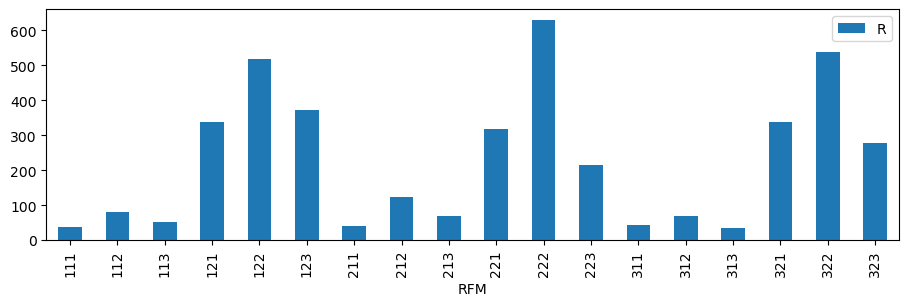

In [101]:
rfm.groupby('RFM').agg({'R':'count'}).plot(kind='bar', figsize = (11, 3))